In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split,GridSearchCV
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

train = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')

test = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')

sample = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv')
sample

train




/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5100 W ADAMS BL,NaN,34.0334,-118.3523,05/24/2020 12:00:00 AM,05/24/2020 12:00:00 AM,700.0,3.0,Southwest,303.0,...,51.0,M,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Violent Crimes
19996,16900 ROSCOE BL,NaN,34.2212,-118.5011,12/25/2020 12:00:00 AM,12/25/2020 12:00:00 AM,259.0,10.0,West Valley,1008.0,...,0.0,M,W,301.0,GAS STATION,NaN,NaN,IC,Invest Cont,Property Crimes
19997,1000 S SHENANDOAH ST,NaN,34.0571,-118.3815,09/25/2020 12:00:00 AM,09/25/2020 12:00:00 AM,1400.0,8.0,West LA,849.0,...,42.0,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,Property Crimes
19998,300 W SEPULVEDA ST,NaN,33.7451,-118.2835,06/10/2020 12:00:00 AM,06/10/2020 12:00:00 AM,600.0,5.0,Harbor,558.0,...,76.0,F,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Crimes against Public Order


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [3]:
train.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


## EDA

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

In [5]:
X_train , y_train = train.drop("Crime_Category",axis=1).copy(), train["Crime_Category"].copy()

In [6]:
victim_age = X_train["Victim_Age"].copy()

count    15166.000000
mean        39.740736
std         15.767421
min          2.000000
25%         28.000000
50%         37.000000
75%         50.000000
max         99.000000
Name: Victim_Age, dtype: float64


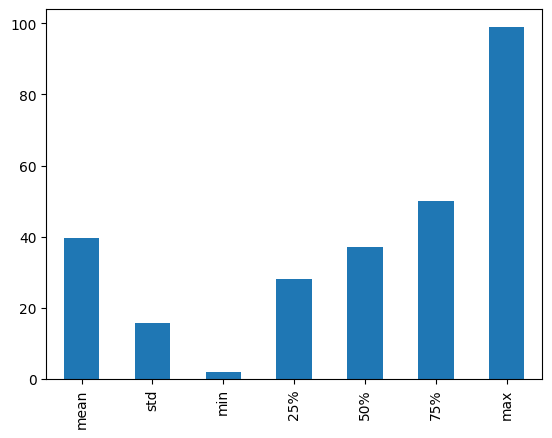

In [7]:
victim_age = victim_age.where(victim_age >=1, np.nan)
print(victim_age.describe())
victim_age.describe()[1:].plot(kind="bar")
plt.show()

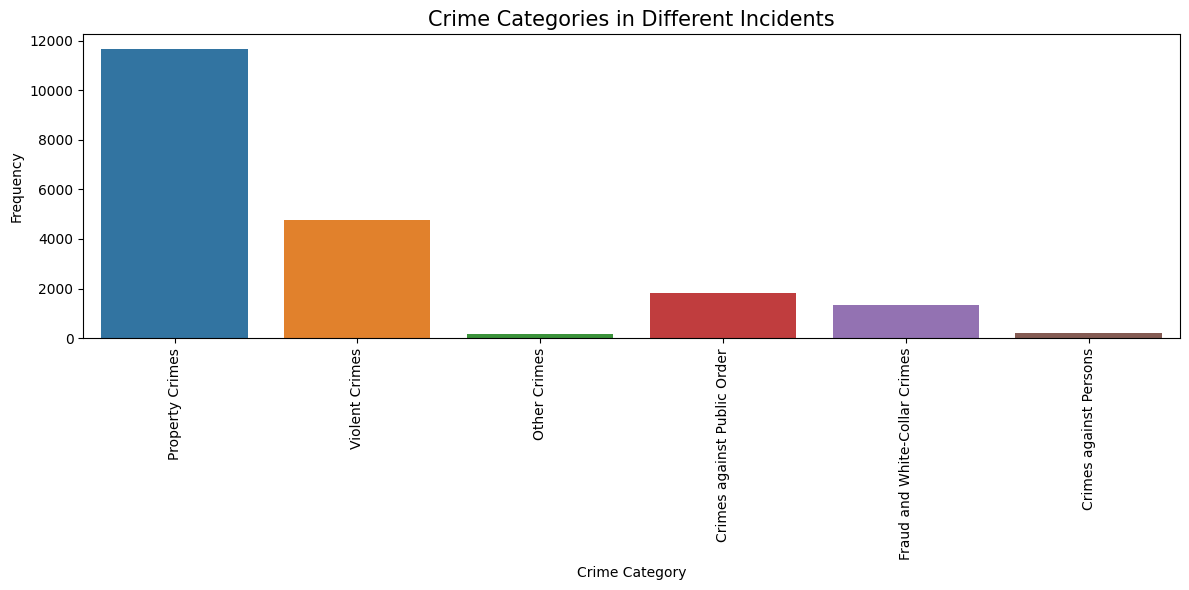

In [8]:

# Bar plot for crime category distributions
fig1, ax1 = plt.subplots(figsize=(12, 6))
crime_counts = train['Crime_Category'].value_counts()
sns.countplot(x='Crime_Category', data=train, ax=ax1)
ax1.set_xlabel('Crime Category')
ax1.set_ylabel('Frequency')
ax1.set_title('Crime Categories in Different Incidents', fontsize=15)
ax1.tick_params(axis='x', rotation=90)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()

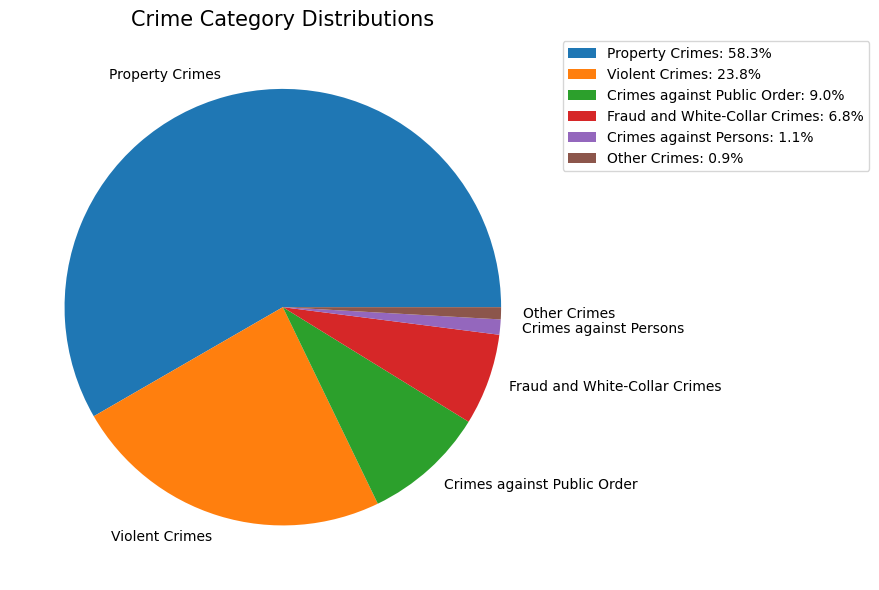

In [9]:
fig2, ax2 = plt.subplots(figsize=(12, 6))
percentages = (crime_counts.values * 100) / len(train)
percentages = [round(percentage, 1) for percentage in percentages]
crime_counts.plot(kind='pie', autopct="", labels=crime_counts.index, ax=ax2)
ax2.set_ylabel('')
ax2.set_title('Crime Category Distributions', fontsize=15)
ax2.legend(labels=[f"{label}: {percentage}%" for label, percentage in zip(crime_counts.index, percentages)], loc="best", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


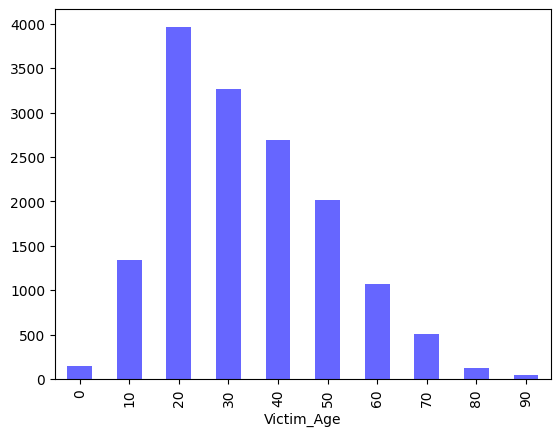

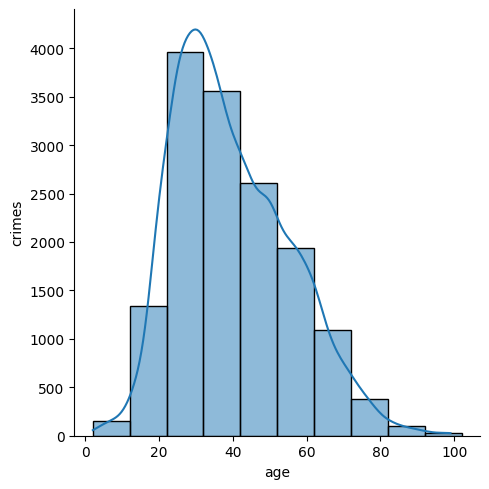

In [10]:
binned = pd.cut(victim_age, bins=10, labels=[x for x in range(0,100,10)])
binned.value_counts().sort_index().plot.bar(alpha=0.6, color='b', label='Binned Age Distribution')
sns.displot(victim_age,kde=True,binwidth=10)
plt.xlabel("age")
plt.ylabel("crimes")
plt.show()

In [11]:
num_cols = train.select_dtypes(include=['int64','float64']).columns.tolist()

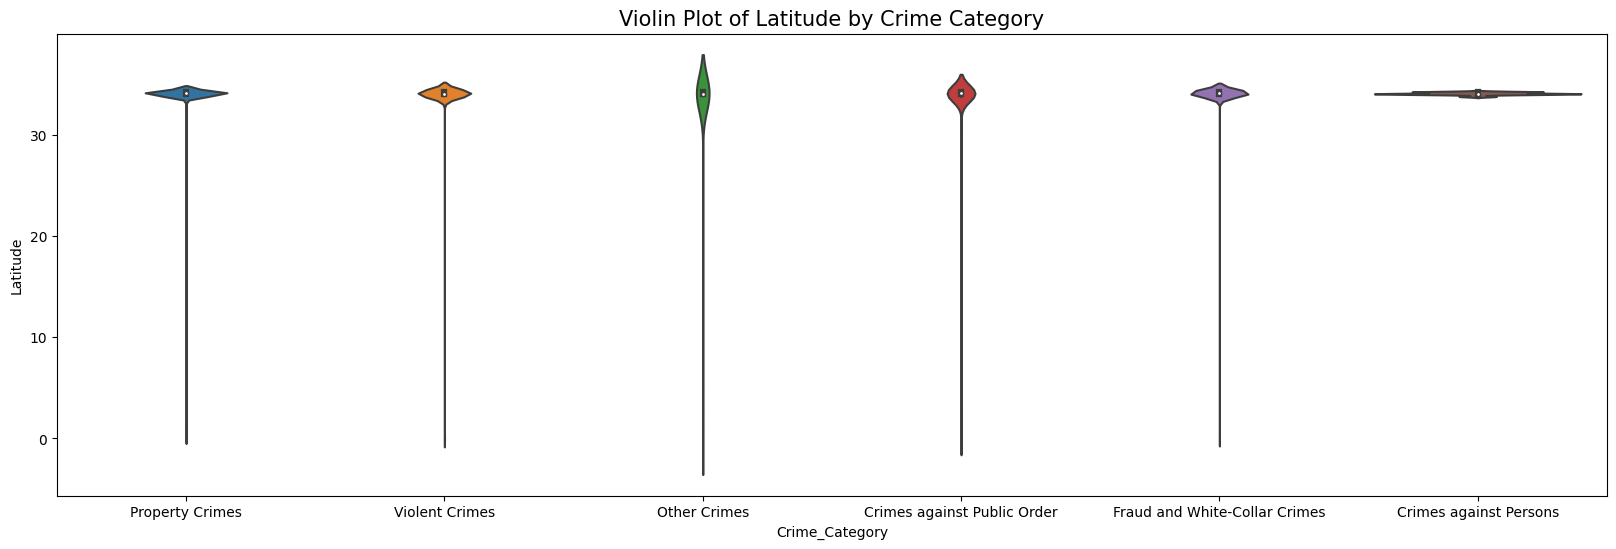

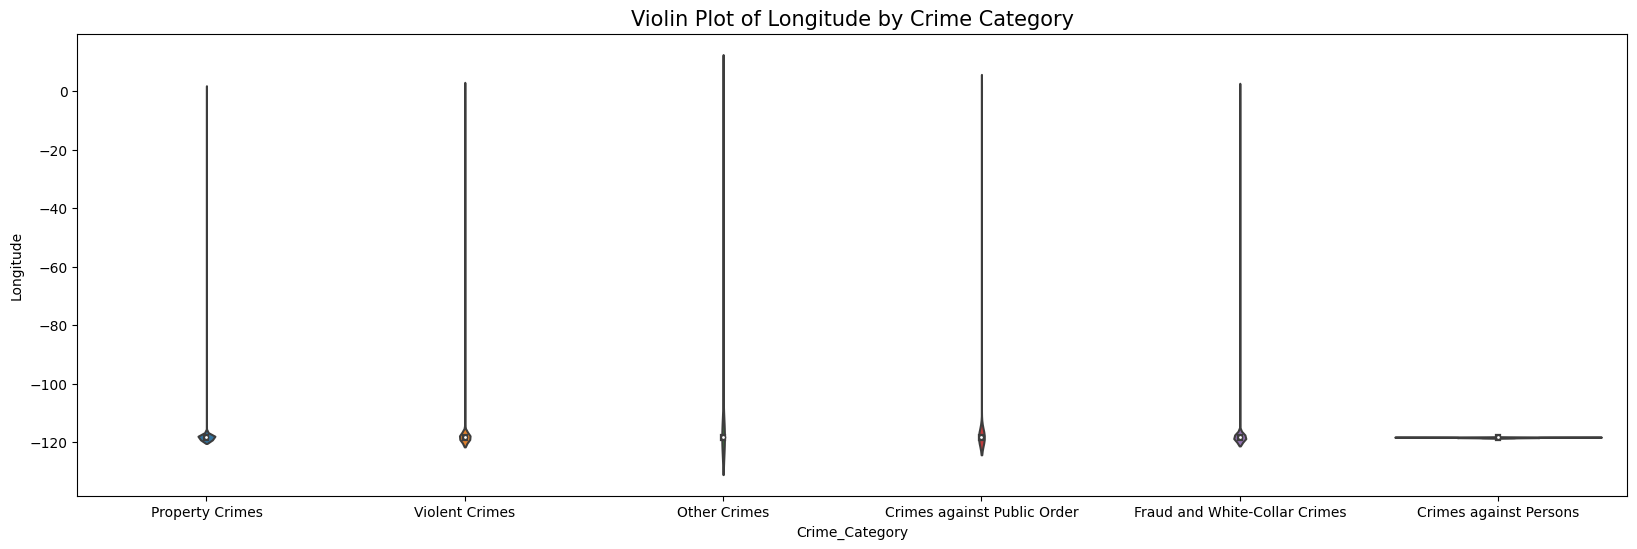

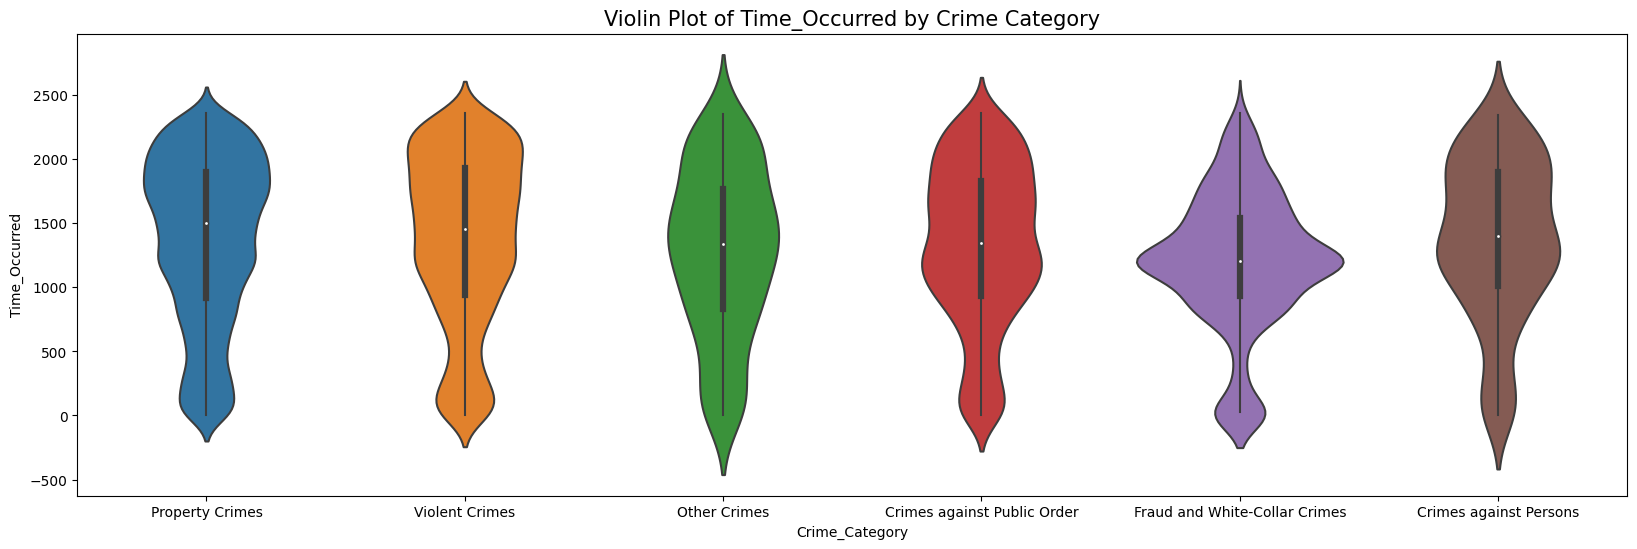

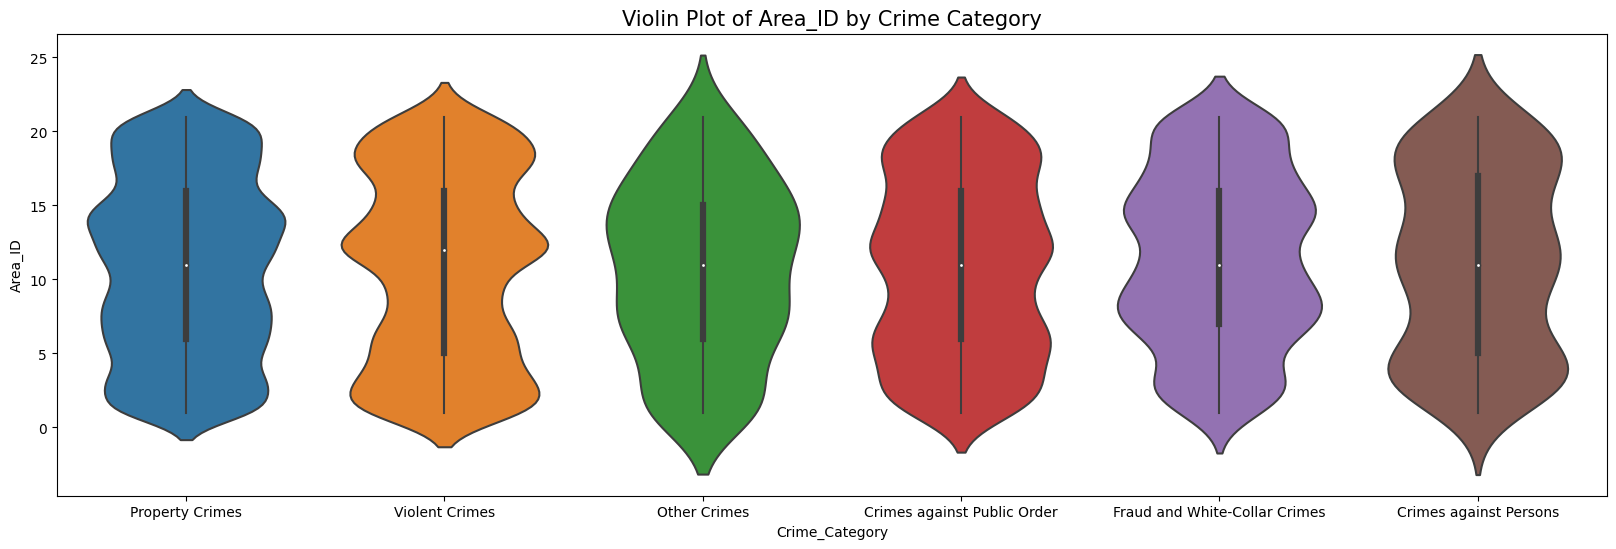

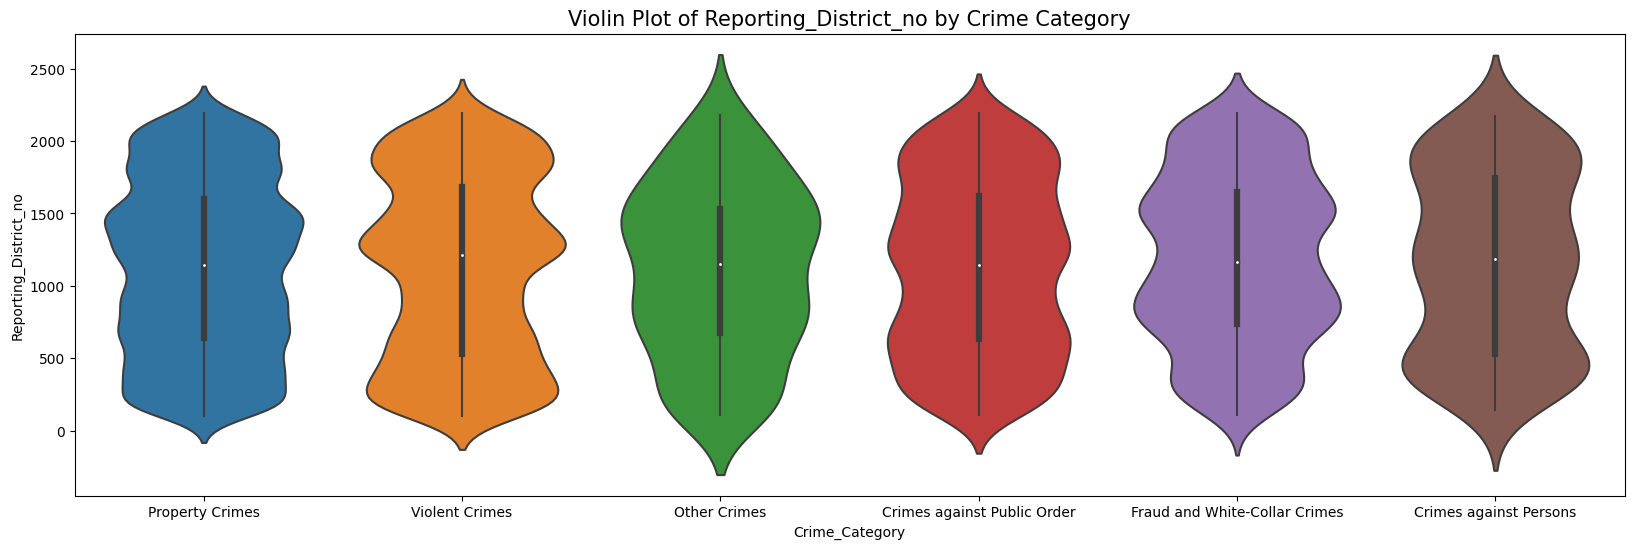

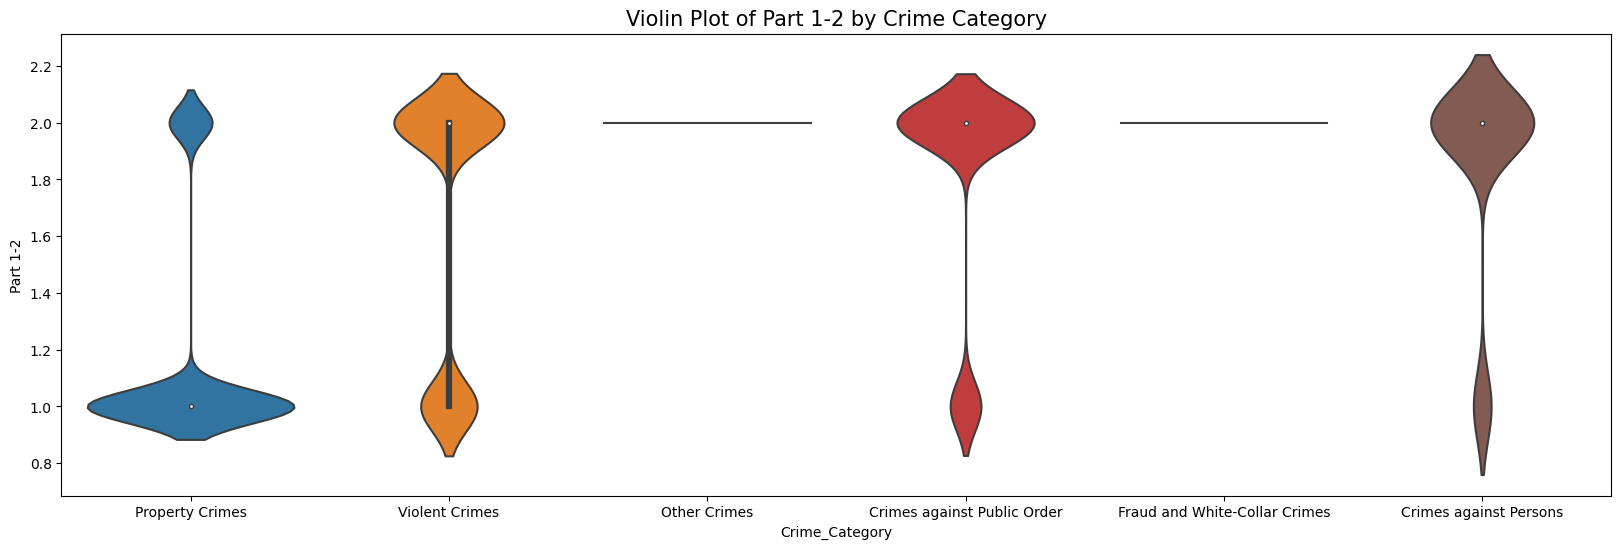

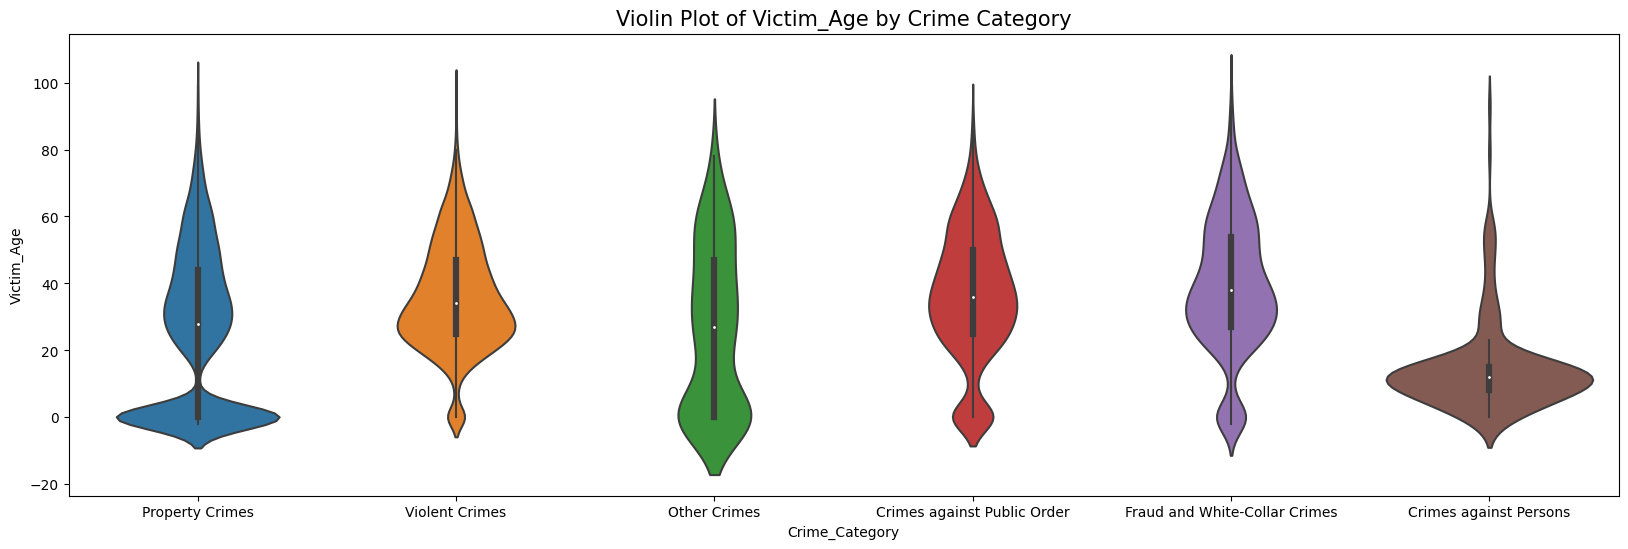

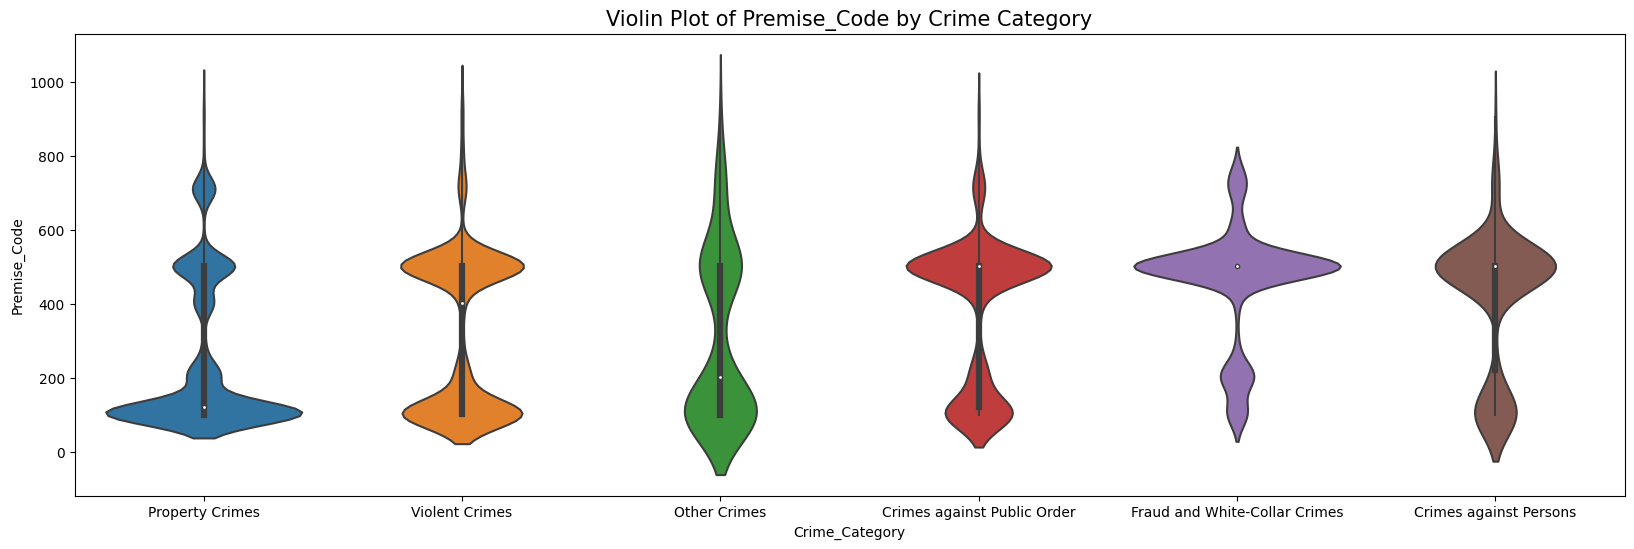

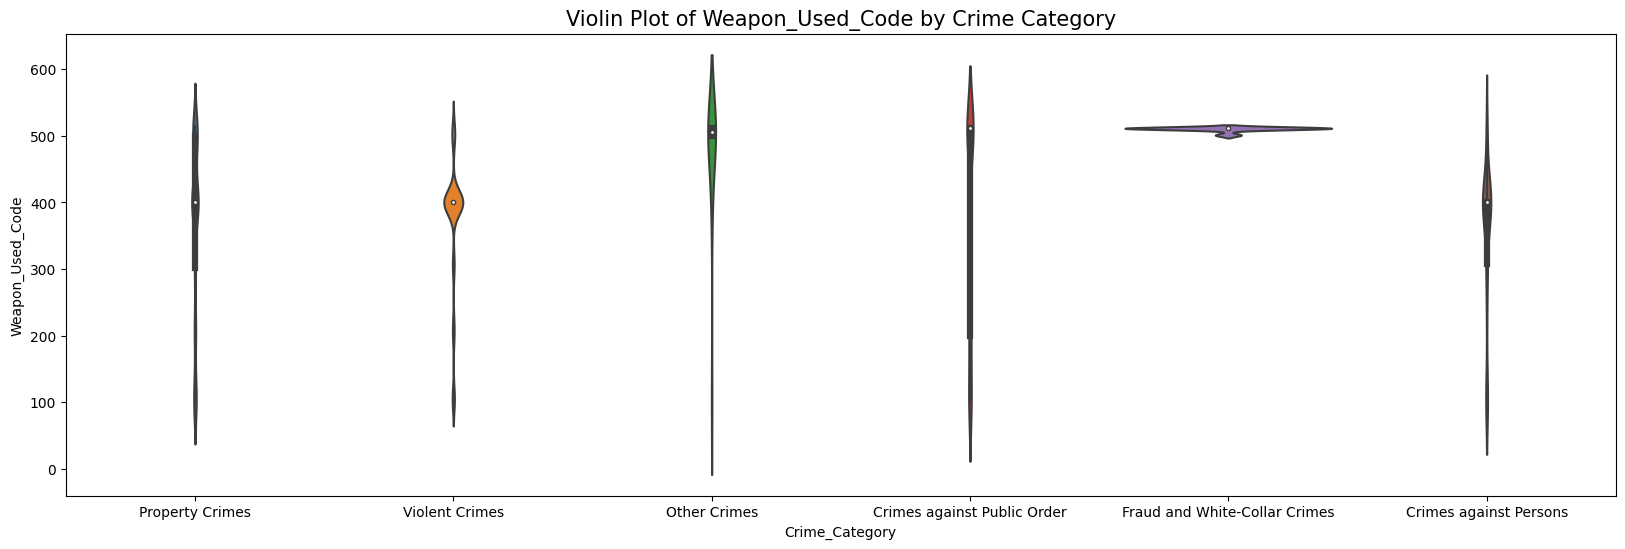

In [12]:
# Violin plot for numerical features by Crime Category
for col in num_cols:
    plt.figure(figsize=(20, 6))
    sns.violinplot(x='Crime_Category', y=col, data=train)
    plt.title(f'Violin Plot of {col} by Crime Category', fontsize=15)
    plt.show()


The plots in which the distribution of the datapoints are more distributed and capture more variance ex:Time_Occured,Area_ID,Reporting_District_No Victim_Age,Premise_code comparatively


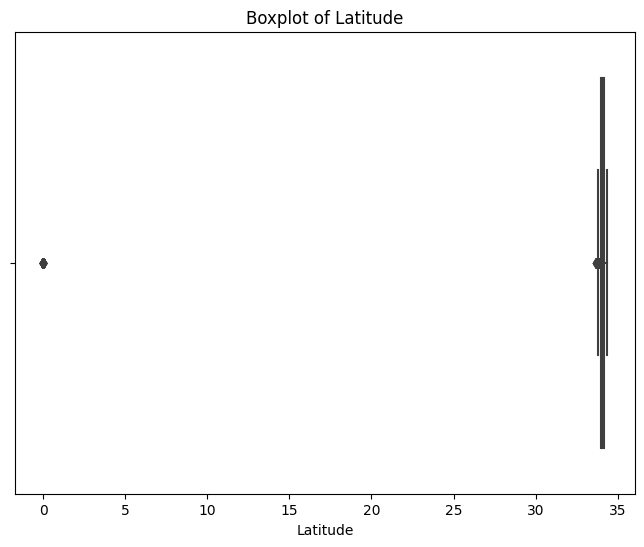

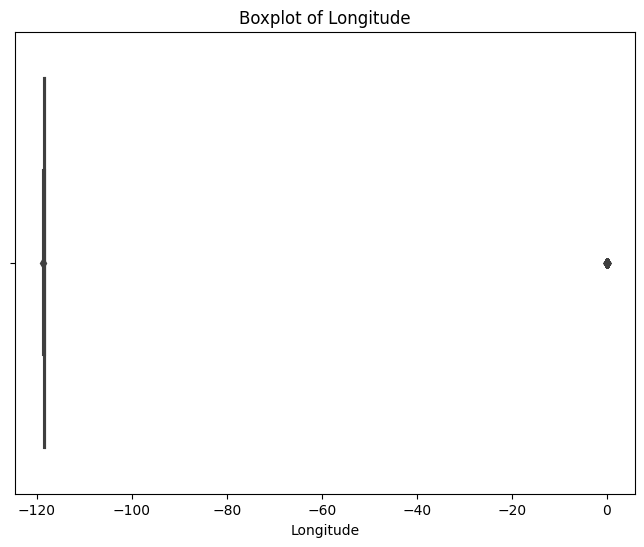

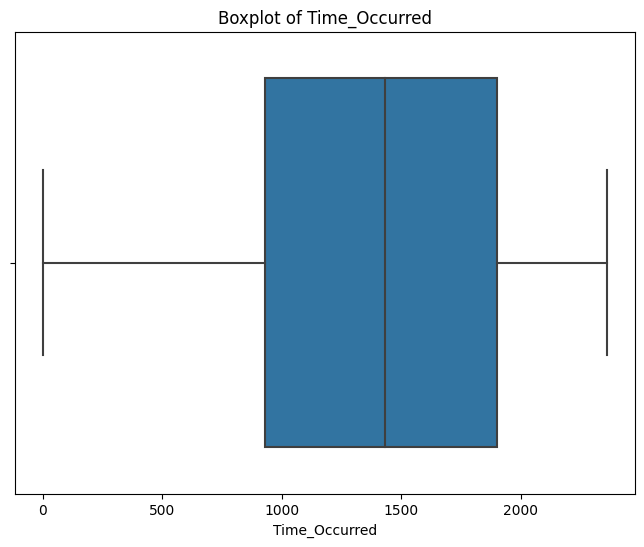

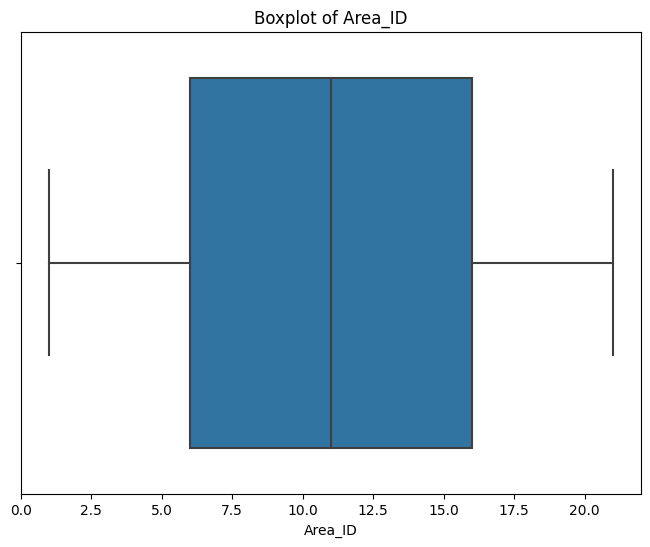

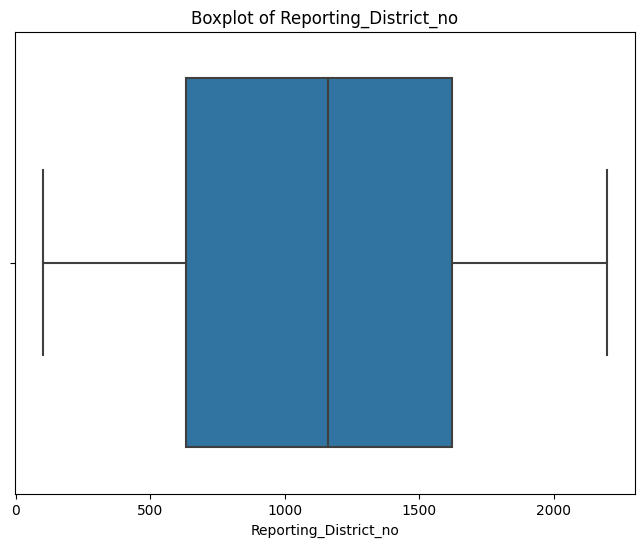

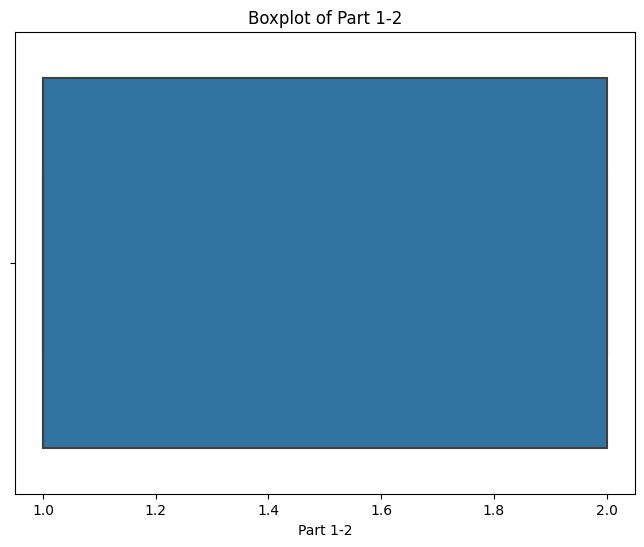

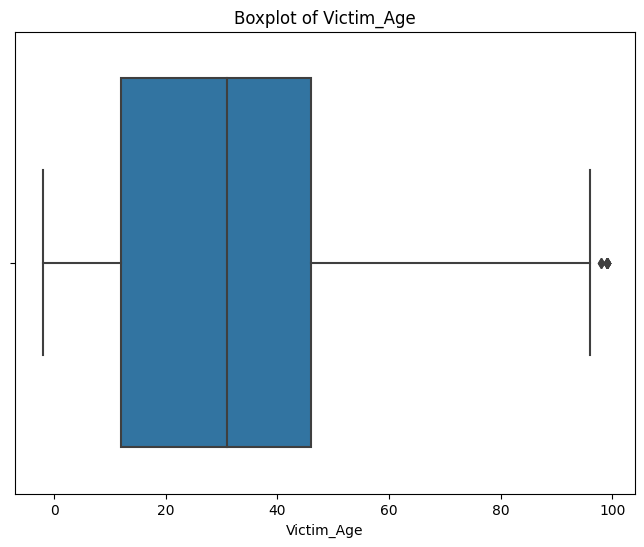

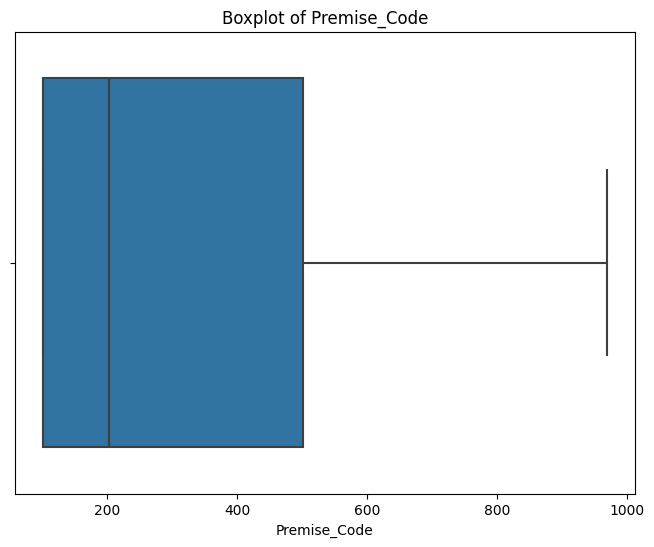

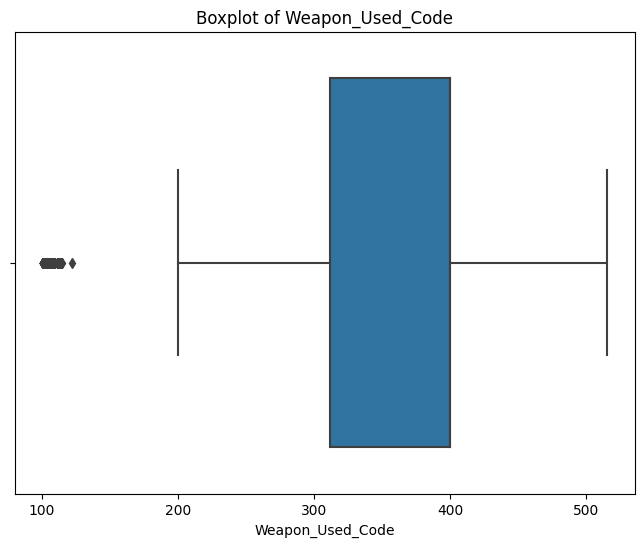

In [13]:
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

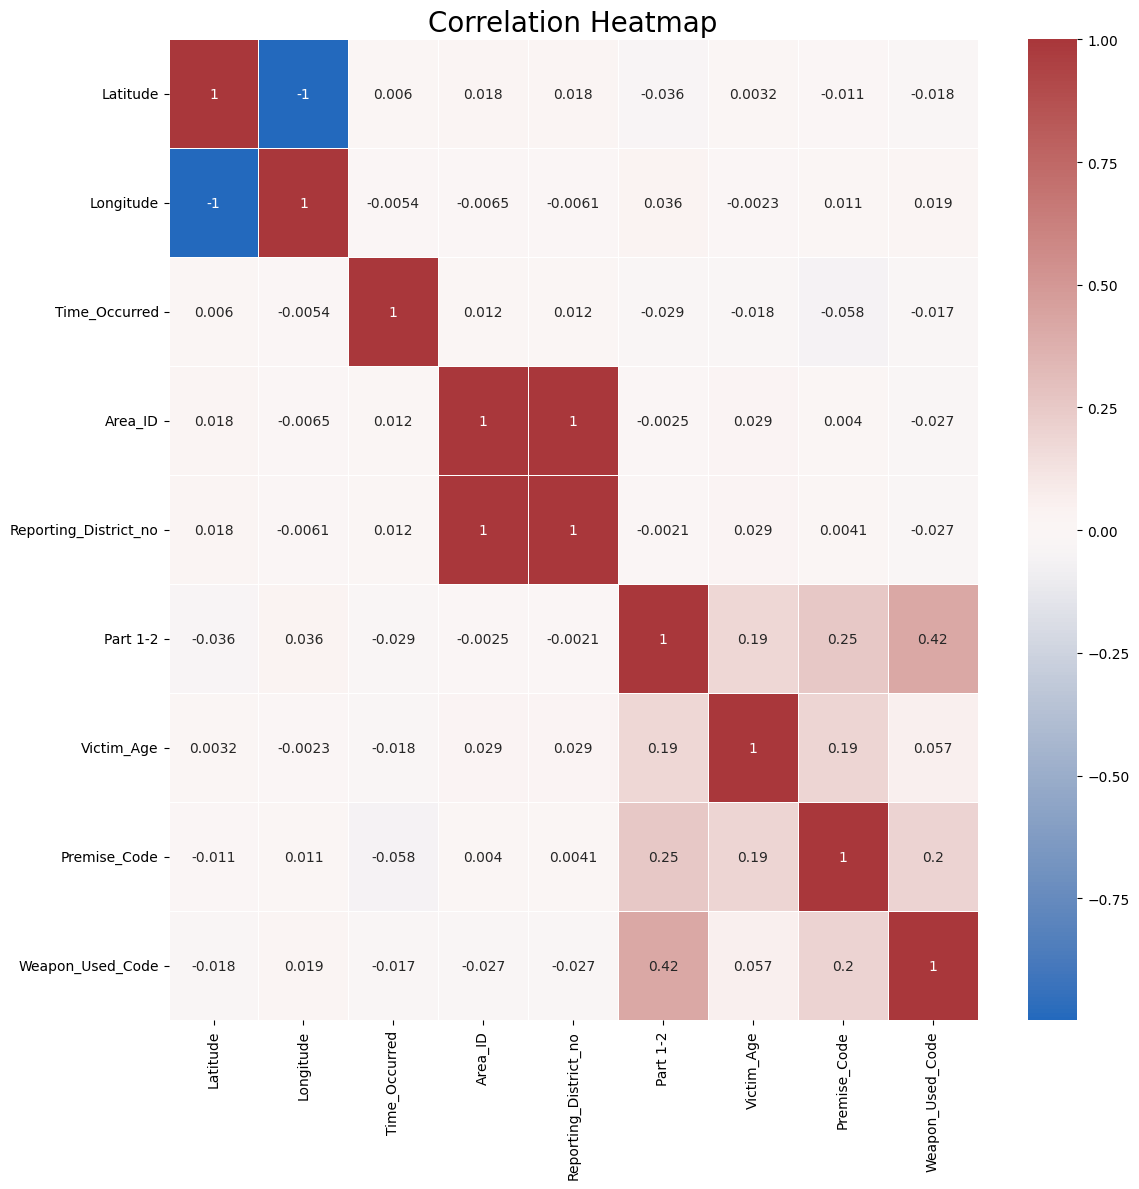

In [14]:
num_col = train.select_dtypes(include=['int64','float64']).columns.tolist()
correlation_matrix = train[num_col].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='vlag', linewidths=.5)
plt.title('Correlation Heatmap', fontsize=20)
plt.tight_layout()
plt.show()

## Inference of HeatMap

1. Latitude and Longitude: The negative correlation suggests a geographic trend where certain crimes may occur more frequently in specific areas.
2. Area_ID and Reporting_District_no: Since these two features are highly correlated, they might represent similar or overlapping concepts in the dataset.
3. Premise_Code and Weapon_Used_Code: The moderate positive correlation indicates that certain types of premises are more likely to involve the use of weapons

## Preprocessing

## Date preprocess


In [15]:
from datetime import datetime

def get_date_from_string(string):
    date = string.split()[0]
    #convertdate to number
    return datetime.strptime(date, "%m/%d/%Y")
dr_new = train['Date_Reported'].map(get_date_from_string)
do_new = train['Date_Occurred'].map(get_date_from_string)
day_diff = pd.Series(int(x.total_seconds()/(24*60*60)) for x in dr_new-do_new)
train["Days_for_report"] = day_diff
train = train.drop(columns=['Date_Occurred', 'Date_Reported'])

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Time_Occurred          20000 non-null  float64
 5   Area_ID                20000 non-null  float64
 6   Area_Name              20000 non-null  object 
 7   Reporting_District_no  20000 non-null  float64
 8   Part 1-2               20000 non-null  float64
 9   Modus_Operandi         17259 non-null  object 
 10  Victim_Age             20000 non-null  float64
 11  Victim_Sex             17376 non-null  object 
 12  Victim_Descent         17376 non-null  object 
 13  Premise_Code           20000 non-null  float64
 14  Premise_Description    19995 non-null  object 
 15  We

## Pipline for Preprocessing

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler,MinMaxScaler,PolynomialFeatures
from sklearn.decomposition import TruncatedSVD
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

In [18]:
num_cols = train.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols.remove('Area_ID')
cat_cols = train.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('Crime_Category')

In [19]:
num_transformer = Pipeline(steps=[
    ('num_imputer',SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [20]:
cat_transformer = Pipeline(steps=[
    ('cat_imputer',SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols),
    ]
)

In [22]:
feature_engineering = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svd', TruncatedSVD(n_components=2)),  
])

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Time_Occurred          20000 non-null  float64
 5   Area_ID                20000 non-null  float64
 6   Area_Name              20000 non-null  object 
 7   Reporting_District_no  20000 non-null  float64
 8   Part 1-2               20000 non-null  float64
 9   Modus_Operandi         17259 non-null  object 
 10  Victim_Age             20000 non-null  float64
 11  Victim_Sex             17376 non-null  object 
 12  Victim_Descent         17376 non-null  object 
 13  Premise_Code           20000 non-null  float64
 14  Premise_Description    19995 non-null  object 
 15  We

In [24]:
train['Reporting_District_no']

0        1563.0
1        1367.0
2        1343.0
3        1924.0
4        1245.0
          ...  
19995     303.0
19996    1008.0
19997     849.0
19998     558.0
19999     397.0
Name: Reporting_District_no, Length: 20000, dtype: float64

In [25]:
X = train.drop('Crime_Category',axis='columns')
y = train['Crime_Category']

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
train['Time_Occurred']

0        1800.0
1        1345.0
2         605.0
3        1800.0
4        1130.0
          ...  
19995     700.0
19996     259.0
19997    1400.0
19998     600.0
19999    1800.0
Name: Time_Occurred, Length: 20000, dtype: float64

In [28]:
num_cols

['Latitude',
 'Longitude',
 'Time_Occurred',
 'Reporting_District_no',
 'Part 1-2',
 'Victim_Age',
 'Premise_Code',
 'Weapon_Used_Code',
 'Days_for_report']

In [29]:
cat_cols

['Location',
 'Cross_Street',
 'Area_Name',
 'Modus_Operandi',
 'Victim_Sex',
 'Victim_Descent',
 'Premise_Description',
 'Weapon_Description',
 'Status',
 'Status_Description']

## Hyper Parameter Tuning

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,BaggingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier,DaskLGBMClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix,roc_curve,RocCurveDisplay,auc

In [31]:
models = [
    SVC(),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    DecisionTreeClassifier()
]

In [32]:
param_grids = [
    {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__gamma': ['scale', 'auto']
    },
    {
        'classifier__n_estimators': [10, 50, 100],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    {
        'classifier__n_estimators': [10, 50, 100],
        'classifier__learning_rate': [0.01, 0.1, 0.5],
        'classifier__max_depth': [3, 5, 7]
    },
    {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 7]
    },
    {
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__splitter': ['best', 'random'],
        'classifier__max_depth': [None, 10, 20, 30]
    }
]

## Pipeline for HPT

In [33]:
# Created individual pipelines
svc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=True, eval_metric='mlogloss'))
])

dtc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Appended pipelines to a list
pipelines = [svc_pipeline, rf_pipeline, gb_pipeline, xgb_pipeline, dtc_pipeline]

In [34]:
svc_gs = GridSearchCV(estimator=pipelines[0], param_grid=param_grids[0], cv=3, n_jobs = -1, verbose=2)
rfc_gs = GridSearchCV(estimator=pipelines[1], param_grid=param_grids[1], cv=3, n_jobs = -1, verbose=2)
gbc_gs = GridSearchCV(estimator=pipelines[2], param_grid=param_grids[2], cv=3, n_jobs = -1, verbose=2)
xgb_gs = GridSearchCV(estimator=pipelines[3], param_grid=param_grids[3], cv=3, n_jobs = -1, verbose=2)
dtc_gs = GridSearchCV(estimator=pipelines[4], param_grid=param_grids[4], cv=3, n_jobs = -1, verbose=2)

gridsearches = {
    'SVC': svc_gs,
    'RandomForestClassifier': rfc_gs,
    'GradientBoostingClassifier': gbc_gs,
    'XGBClassifier': xgb_gs,
    'DecisionTreeClassifier': dtc_gs
}

In [35]:
# for name, gs in gridsearches.items():
#     if( name != 'XGBClassifier'):
#         gs.fit(X_train, y_train)
#         best_params = gs.best_params_
#         best_score = gs.best_score_
#         y_pred = gs.predict(X_val)
#         accuracy = accuracy_score(y_val, y_pred)
#         print(f"Model: {name}")
#         print(f"Best Parameters: {best_params}")
#         print(f"Best Cross-Validation Score: {best_score}")
#         print(f"Test Set Accuracy: {accuracy}\n")

## Random Forest Classifier

## Model: RandomForestClassifier
## Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
## Best Cross-Validation Score: 0.8534998308972863
## Test Set Accuracy: 0.8555

## Support Vector Machine

## Model: SVC
## Best Parameters: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
## Best Cross-Validation Score: 0.8786249717097757
## Test Set Accuracy: 0.8855

## Gradient Boosting Classifier

## Model: GradientBoostingClassifier
## Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 100}
## Best Cross-Validation Score: 0.8882499171008836
## Test Set Accuracy: 0.8905

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [38]:
gridsearches['XGBClassifier'].fit(X_train,y_train_encoded)
best_params = gridsearches['XGBClassifier'].best_params_
best_score = gridsearches['XGBClassifier'].best_score_
y_pred = gridsearches['XGBClassifier'].predict(X_val)
y_pred = label_encoder.inverse_transform(y_pred)
accuracy = accuracy_score(y_val, y_pred)
print(f"Model: XGBClassifier")
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")
print(f"Test Set Accuracy: {accuracy}\n")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Model: XGBClassifier
Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}
Best Cross-Validation Score: 0.8914374405618201
Test Set Accuracy: 0.897



# Model: XGBClassifier
> ****# Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}
> # Best Cross-Validation Score: 0.8919374600957554
> # Test Set Accuracy: 0.8985

In [39]:
cr = accuracy_score(y_val, y_pred)

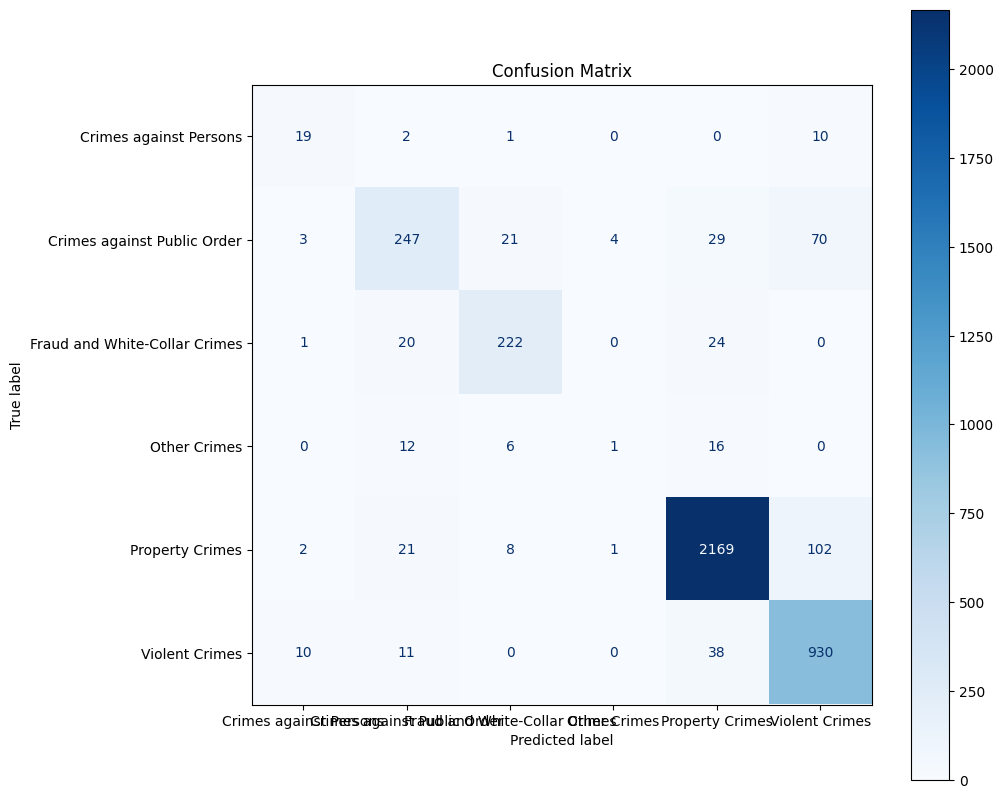

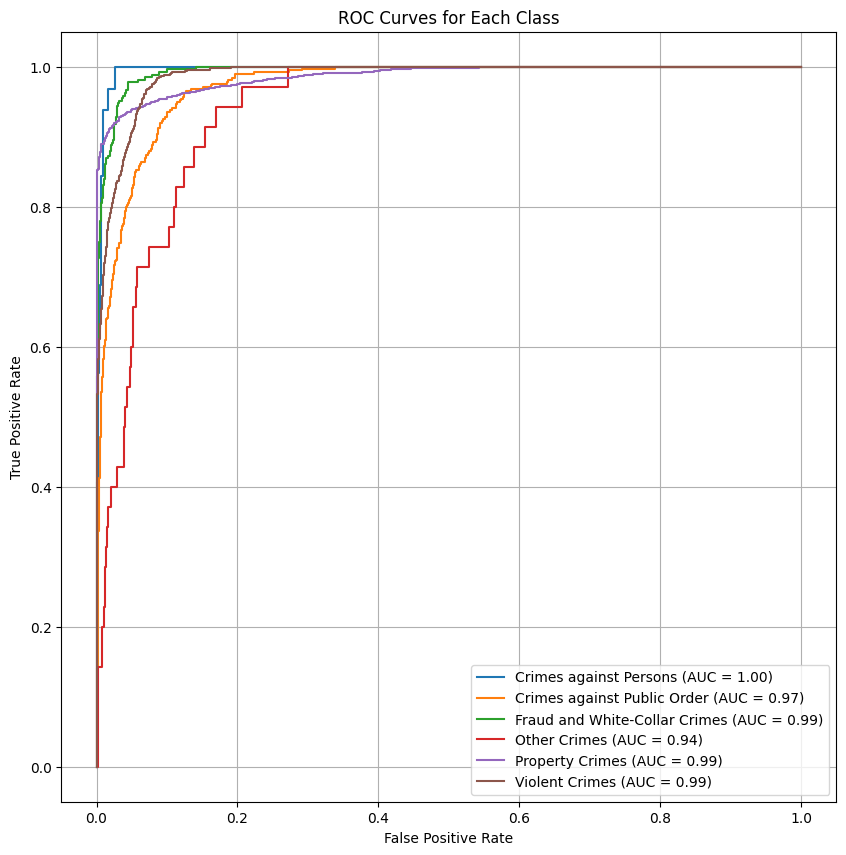

In [40]:
conf_matrix = confusion_matrix(y_val, y_pred, labels=label_encoder.classes_)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=label_encoder.classes_)

# PlotTING the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Calculate THE ROC curve and AUC for each class
fig, ax = plt.subplots(figsize=(10, 10))

# Computation ROC curve and ROC area for each class
y_val_encoded = label_encoder.transform(y_val)
y_prob = gridsearches['XGBClassifier'].predict_proba(X_val)

for i, class_label in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_val_encoded == i, y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=class_label).plot(ax=ax)

plt.title('ROC Curves for Each Class')
# plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend(loc="lower right")
plt.show()

In [41]:
test.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,03/03/2020 12:00:00 AM,03/03/2020 12:00:00 AM,2000.0,3.0,Southwest,376.0,...,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,06/01/2020 12:00:00 AM,04/25/2020 12:00:00 AM,1700.0,20.0,Olympic,2014.0,...,0344 0394,26.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
2,300 E 111TH ST,NaN,33.9348,-118.2695,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,900.0,18.0,Southeast,1844.0,...,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,HIGH SCHOOL,NaN,NaN,IC,Invest Cont
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,12/23/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2200.0,7.0,Wilshire,765.0,...,NaN,0.0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont
4,11000 MORRISON ST,NaN,34.1611,-118.3704,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,130.0,15.0,N Hollywood,1555.0,...,1501,37.0,F,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other


In [42]:
dr_new = test['Date_Reported'].map(get_date_from_string) 
do_new = test['Date_Occurred'].map(get_date_from_string)
day_diff = pd.Series(int(x.total_seconds()/(24*60*60)) for x in dr_new-do_new)
test["Days_for_report"] = day_diff
test = test.drop(columns=['Date_Occurred', 'Date_Reported'])

In [43]:
y_encoded = label_encoder.fit_transform(y)

In [44]:
gridsearches['XGBClassifier'].fit(X,y_encoded)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Latitude',
                                                                          'Longitude',
                                                                          'Time_Occurred',
                                                                          'Reporting_District_no',
                                                                          'Part '
                                                                          '1-2',
                                                                          'Victim_Age',
                                                                          'Premise_Code',
                                                                          'Weapon_Used_Code',
                                                                          'Days_for_report']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('cat_i...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [50, 100, 200]},
             verbose=2)

In [45]:
y_pred = gridsearches['XGBClassifier'].predict(test)
y_pred = label_encoder.inverse_transform(y_pred)

## Submission


In [46]:
submission = pd.DataFrame({"ID": np.arange(1,5001), 
                           "Crime_Category": y_pred,
                          }
                         )
submission.to_csv('submission.csv',index=False)

In [47]:
submission

,ID,Crime_Category
0,1,Violent Crimes
1,2,Property Crimes
2,3,Property Crimes
3,4,Property Crimes
4,5,Crimes against Public Order
...,...,...
4995,4996,Property Crimes
4996,4997,Property Crimes
4997,4998,Violent Crimes
4998,4999,Violent Crimes
